# Bounded Neighborhood and container polygon

In this notebook we will develop a slight modification to the algorithm to get the Neighborhood of the Quasiperiodic Lattice around an arbitrary point in the space.

This modification consist in, at the moment to generate the vertices of the polygons that live in the Neighborhood, we ask if that polygon have at least one of his vertices inside of a circle of a given radius around the arbitrary point.

If so, we keep that polygon, if not, we doesn't consider it.

This reduce the number of polygons to consider at the moment to search for the container polygon, but have the inconvenient that is so local, so this neighborhood cannot be used for too much time until we need to generate a new one.

In general, with its virtues and defects, we present this algorithm for completeness around the develop of the final code. In the biggest algorithm used at the final of the thesis work, this algorithm might not be used.

Let's load the files that will be needed in this notebook.

In [1]:
include("Operaciones_Basicas.jl")
include("Red_Dual.jl")
include("Separacion_Arreglos_X_Y.jl")
include("Generador_Vecindades_Pto_Arbitrario.jl")
include("Dentro_Fuera_Poligono.jl")
include("Algoritmo_Radio.jl")

poligono_Contenedor_Radio (generic function with 1 method)

We will use the package "Plots" for visualizing the polygons, so let's load it

In [2]:
using Plots

### Generate the neighborhood of the Quasiperiodic Lattice

Create the information of the star vectors required by the GDM algorithm, which determine the symmetry of the quasiperiodic lattice. Also, generate the array that contains the alpha constants and the array with the average distance between stripes.

In [3]:
NSides = 100; #Symmetry of the quasiperiodic lattice
Star_Vectors = [[BigFloat(1),0]]; #Array wich will contain the Star Vectors
for i in 1:(NSides-1)
    push!(Star_Vectors, [cos((2*i)*pi/NSides), sin((2*i)*pi/NSides)]); #Complete the Star_Vector Array
end
Alphas_Array = fill(0.2, NSides); #Array of the alphas constant
Average_Distance_Stripes = fill(NSides/2, NSides); #Array with the average distance between stripes

Now, with the function "region_Local_Radio()" we obtain the Neighborhood of the Quasiperiodic Lattice around a given point, keeping just the polygons that has at least one of his vertices within a circle of radius given around the point of interest.

(For a detailed scheme of how this is made, look at the file "Algoritmo_Radio.jl", in particular the functions "generador_Vecindades_Acotado()" and "region_Local_Radio()")

In [4]:
#At high symmetrys (usually above 8) put N = 0, otherwise the computation time can be very high
N = 0; #The margin of error to consider

SL = 1e10; #Size of a half side of the square in which generate a random point inside it

Radius = 3; #Size of the radius that around the point that will discriminate the polygons generated

#Let's generate the arbitrary point around which we will generate the neighborhood
Point = Float64[]; #An Float64 array that will held the coordinates of the arbitrary point

#Generate two random numbers that will determine in which cuadrant will be the arbitrary point
x = rand();
y = rand();

if (x > 0.5) && (y > 0.5)
    Point = [rand()*SL, rand()*SL];
elseif (x > 0.5) && (y < 0.5)
    Point = [rand()*SL, -rand()*SL];
elseif (x < 0.5) && (y > 0.5)
    Point = [-rand()*SL, rand()*SL];
elseif (x < 0.5) && (y < 0.5)
    Point = [-rand()*SL, -rand()*SL];
end

Dual_Points = region_Local_Radio(N, Radius, Average_Distance_Stripes, Star_Vectors, Alphas_Array, Point);

#Let's split the vertices coordinates in X coordinates and Y coordinates
X, Y = separacion_Arreglo_de_Arreglos_2D(Dual_Points);

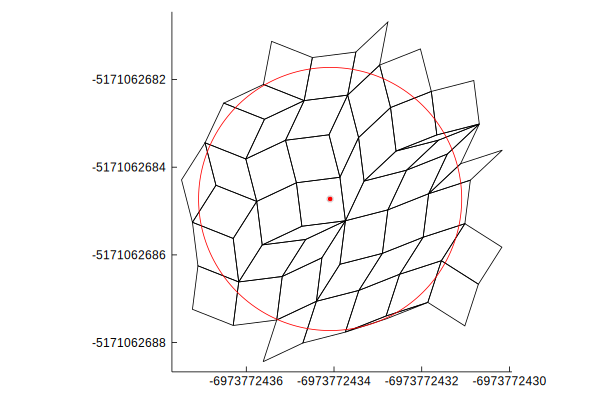

In [5]:
#Let's visualize the quasiperiodic lattice
plot()
for i in 1:4:length(X)
    plot!([X[i],X[i+1],X[i+2],X[i+3],X[i]],[Y[i],Y[i+1],Y[i+2],Y[i+3],Y[i]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
end
scatter!([Point[1]], [Point[2]], legend = false, color = "red")

#Let's visualize the circle that we used to discriminate the polygons
x_c(t) = Point[1] + Radius*cos(t);
y_c(t) = Point[2] + Radius*sin(t);

plot!(x_c, y_c, 0, 2π, leg=false, color = "red")

### Obtain the container polygon

Now, the algorithm to find the container polygon is the same used in the Demo "Container_Polygon", essentially this algorithm consist of generate a semi-line with origin in our point of interest and with an arbitrary direction. We will ask for each of the polygons in the neighborhood if that semiline intersect it, if not, then that polygons doesn't contain our point, if yes we have two options:

If the semiline intersect two sides of the polygon, then that polygon doesn't contain our point.

If the semiline intersect one side of the polygon, then that polygons is the one that contain the point.

In [6]:
#Let's obtain the vertices (P1,P2,P3,P4) of the container polygon
Vertices_Container_Polygon = poligono_Contenedor_Radio(X, Y, Point);

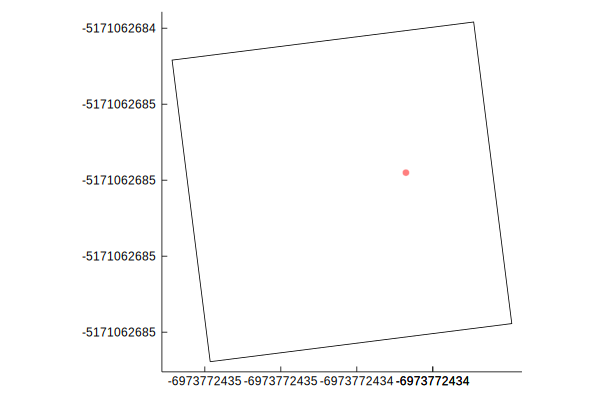

GKS: Possible loss of precision in routine SET_WINDOW


In [7]:
#Let's visualize the container polygon
plot()    
plot([Vertices_Container_Polygon[1][1], Vertices_Container_Polygon[2][1], Vertices_Container_Polygon[3][1], Vertices_Container_Polygon[4][1], Vertices_Container_Polygon[1][1]], [Vertices_Container_Polygon[1][2], Vertices_Container_Polygon[2][2], Vertices_Container_Polygon[3][2], Vertices_Container_Polygon[4][2], Vertices_Container_Polygon[1][2]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
scatter!([Point[1]], [Point[2]], markersize = 5, markeralpha = 0.5, markerstrokewidth = 0, markercolor = :red)